<a href="https://colab.research.google.com/github/ttornike1991/ttornike1991/blob/main/Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt



In [61]:
fashion_mnist=keras.datasets.fashion_mnist #load data 
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data() #split data 

In [62]:
train_images.shape


(60000, 28, 28)

In [50]:
train_images[0,23,23] 

194

In [63]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [64]:
class_name = ['T-shirt/top','Trouser','Pullover',"Dress",'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

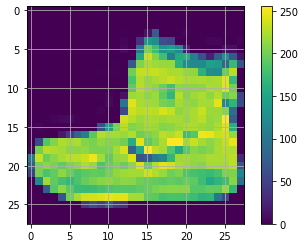

In [65]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [66]:
train_image = train_images / 255.0

test_image = test_images / 255.0

In [67]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [68]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.1699 - accuracy: 0.6908
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6797 - accuracy: 0.7498
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5939 - accuracy: 0.7826
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5565 - accuracy: 0.8014
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5432 - accuracy: 0.8094
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5213 - accuracy: 0.8187
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5154 - accuracy: 0.8201
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5166 - accuracy: 0.8202
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5029 - accuracy: 0.8262
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.498

In [71]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 
print('Test accurecy',test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.5390 - accuracy: 0.8203
Test accurecy 0.8202999830245972


In [72]:
predictions = model.predict(test_images)

In [74]:
predictions[0]

array([2.0317171e-18, 6.0347727e-19, 0.0000000e+00, 1.6383266e-14,
       1.7888849e-33, 2.3700142e-02, 1.5439667e-29, 1.4221309e-01,
       5.2839280e-09, 8.3408672e-01], dtype=float32)

In [75]:
np.argmax(predictions[0])

9

In [76]:
test_labels[0]

9

Pick a number: 3


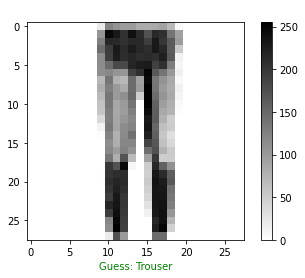

In [81]:
COLOR = 'white'
COLOR2 = 'green'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR2

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
 